# Amazon Home and Kitchen Products Review-Sentiment Analysis-EDA

### Import Necessary Libraries

In [2]:
# Dataframe
import pandas as pd

# Array
import numpy as np

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

# Datetime
from datetime import datetime
# text preprocessing
import spacy
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
import contractions
import unicodedata
tokenizer = ToktokTokenizer()
nlp = spacy.load('en', parse=True, tag=True, entity=True)
from sklearn.feature_extraction.text import CountVectorizer

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Reading the Cleaned Dataset

In [3]:
# Read the file
df2 = pd.read_csv('D:\GENEL\SPRINGBOARD\PROJECTS\CAPSTONE PROJECTS\CAPSTONE PROJECT-2/Cleaned_Reviews_Home_and_Kitchen.csv')

### Inspecting the Dataset

In [4]:
df2.sample(5)

,customer,product,rating,review_text,pos_feedback,neg_feedback,rating_class,time,clean_text
6542,A3KPD3WLML2Q4E,B0045TJ3IC,4.0,Takes some adjustment I think that to apprecia...,2,1,good,2010-12-30,take adjustment think appreciate knife take ad...
4375,AR74YY08IP2WE,B002R5A0GU,3.0,maybe sorta kinda... I have a friend who irons...,1,0,good,2013-11-18,maybe sorta kinda friend iron sheet quilt wa o...
640,A2ZY49IDE6TY5I,B00004SGFS,5.0,Pretty Cool And No Secret Ingredients I receiv...,3,0,good,2014-04-12,pretty cool no secret ingredient received chri...
7037,ATS2855497V0I,B004J6EL56,4.0,Attractive But... This pressure cooker was com...,3,0,good,2012-09-18,attractive pressure cooker wa competing househ...
6397,A3OXRFCJI67IMN,B0043073YO,5.0,Excellent for me as I make coffee all day long...,1,0,good,2012-12-29,excellent make coffee day long one cup time us...


In [5]:
df2.shape

(25276, 9)

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25276 entries, 0 to 25275
Data columns (total 9 columns):
customer        25276 non-null object
product         25276 non-null object
rating          25276 non-null float64
review_text     25276 non-null object
pos_feedback    25276 non-null int64
neg_feedback    25276 non-null int64
rating_class    25276 non-null object
time            25276 non-null object
clean_text      25276 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 1.7+ MB


In [7]:
import pandas_profiling

In [8]:
pandas_profiling.ProfileReport(df2)

Number of variables,9
Number of observations,25276
Total Missing (%),0.0%
Total size in memory,1.7 MiB
Average record size in memory,72.0 B
Numeric,3
Categorical,5
Boolean,0
Date,0
Text (Unique),1
Rejected,0


## Exploratory Data Analysis

### 1.  "rating_class" Feature (Target Variable)

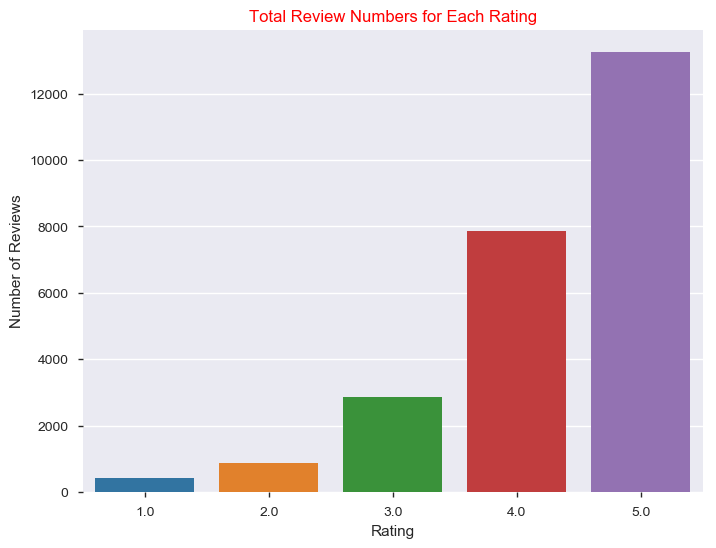

5.0    13264
4.0     7869
3.0     2867
2.0      861
1.0      415
Name: rating, dtype: int64

In [9]:
# Total numbers of ratings in the home and kitchen product reviews
plt.figure(figsize = (8,6))
sns.countplot(df2['rating'])
plt.title('Total Review Numbers for Each Rating', color='r')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
df2['rating'].value_counts()

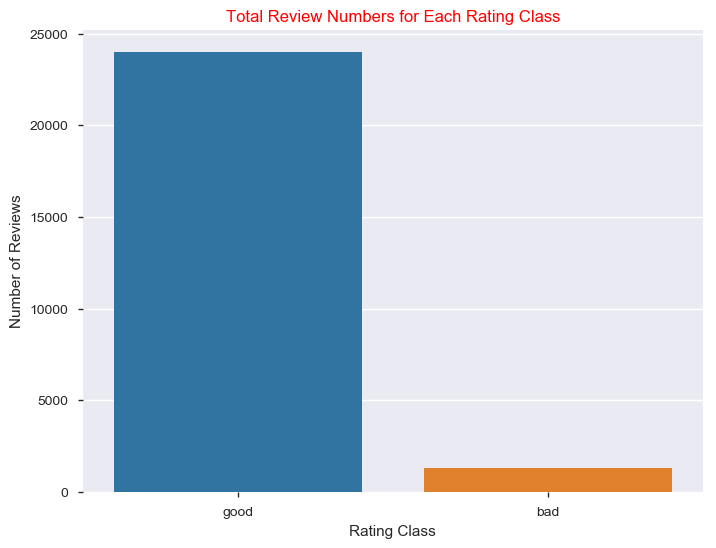

good    24000
bad      1276
Name: rating_class, dtype: int64

In [10]:
# Total numbers of ratings in the home and kitchen product reviews
plt.figure(figsize = (8,6))
sns.countplot(df2['rating_class'])
plt.title('Total Review Numbers for Each Rating Class', color='r')
plt.xlabel('Rating Class')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
df2['rating_class'].value_counts()

Customers wrote reviews and gave ratings, which ranged between 1 to 5, for each home and kitchen product they bought in the Amazon online market. In overall, customers were seemed to be averagely satisfied with the products which they experienced.  

We diminished those 5 rating categories into two categories such as 'good' and 'bad' in order to implement a sentiment analysis on their reviews. According to those reviews, there is an imbalance between rating classes. Especially 1 and 2 ratings have small portions according to other classes. 95.0% of the reviews (24000) are classified as good, whereas 5.0 % of them (1276) are classified as bad.

### 2. Features

### 2.1. "year" Feature

In [11]:
# Create a year column and drop time column
df2['time'] = pd.to_datetime(df2['time'], format = '%Y %m %d')
df2['year'] = df2['time']
df2.head(10)

,customer,product,rating,review_text,pos_feedback,neg_feedback,rating_class,time,clean_text,year
0,A1115ST6F5CWYP,B00000JGRT,4.0,good for a first ice cream machine I have had ...,29,4,good,2006-05-22,good first ice cream machine one year still ru...,2006-05-22
1,A188JOXWF4EY1R,B00000JGRT,4.0,Wonderful Product! We actually found this prod...,4,0,good,2010-08-19,wonderful product actually found product clear...,2010-08-19
2,AUAX1QWUCYKSX,B00000JGRT,5.0,"Works as expected This product works great, if...",1,0,good,2009-05-29,work expected product work great unit kept fre...,2009-05-29
3,A2C27IQUH9N1Z,B00000JGRT,5.0,this will be one of your favorite small applia...,12,1,good,2003-01-28,one favorite small appliance trying ice cream ...,2003-01-28
4,A2PN65B6BSTIYZ,B00000JGRT,5.0,You'll be addicted to homemade ice cream! I bo...,1,0,good,2008-06-23,addicted homemade ice cream bought ice cream m...,2008-06-23
5,A3U4GW06XNSI2Q,B00000JGRT,5.0,Ice cream in a snap--buy no other! This is THE...,9,0,good,2007-03-07,ice cream snapbuy no best fool proof way makin...,2007-03-07
6,ATJV9TWMRNF8K,B00000JGRT,5.0,Ice Cream Cookbook Authors Machine of Choice I...,4,2,good,2009-05-26,ice cream cookbook author machine choice autho...,2009-05-26
7,A17V9XL4CWTQ6G,B00000JGRT,5.0,First-hand comparison of 3 ice cream maker mod...,21,1,good,2010-06-14,firsthand comparison ice cream maker model com...,2010-06-14
8,A23GFTVIETX7DS,B00000JGRT,4.0,"Easy ice cream, with some advance preparation ...",2,1,good,2008-12-23,easy ice cream advance preparation cuisinart q...,2008-12-23
9,A3RR2P5IS3DGPR,B00000JGRT,5.0,Almost 8 1/2 years old and going strong! Gre...,4,0,good,2010-05-25,almost year old going strong great kefir cocon...,2010-05-25


In [12]:
# Let's see how the rating classes change for each year in a table and graph.
# Create a dataframe which shows the relationship between review numbers and rating classes for each year

df2['rating_class_num'] = df2['rating_class'].map({'good': 1, 'bad': 0})
    
feature = df2.groupby('year').agg({'rating_class_num':['size', 'sum', 'mean']})
feature.columns = [' '.join(col).strip() for col in feature.columns.values]
feature = feature.reset_index()
feature['rating_class_num mean'] = feature['rating_class_num mean']*100
feature.columns = ['Year', 'Total Reviews', 'Relevant Rating Number', 
                       '% of Relevant Rating Number in This Year'] 
feature['% of Relevant Rating in the Total'] = (feature['Relevant Rating Number'] / 22425)*100
        
feature

,Year,Total Reviews,Relevant Rating Number,% of Relevant Rating Number in This Year,% of Relevant Rating in the Total
0,2000-05-21,1,1,100.000000,0.004459
1,2000-07-17,1,1,100.000000,0.004459
2,2000-08-31,1,1,100.000000,0.004459
3,2000-09-05,1,1,100.000000,0.004459
4,2000-09-28,1,1,100.000000,0.004459
5,2000-10-03,1,1,100.000000,0.004459
6,2000-10-07,1,1,100.000000,0.004459
7,2000-11-02,1,1,100.000000,0.004459
8,2000-11-20,1,1,100.000000,0.004459
9,2000-12-17,1,1,100.000000,0.004459


<Figure size 1200x800 with 0 Axes>

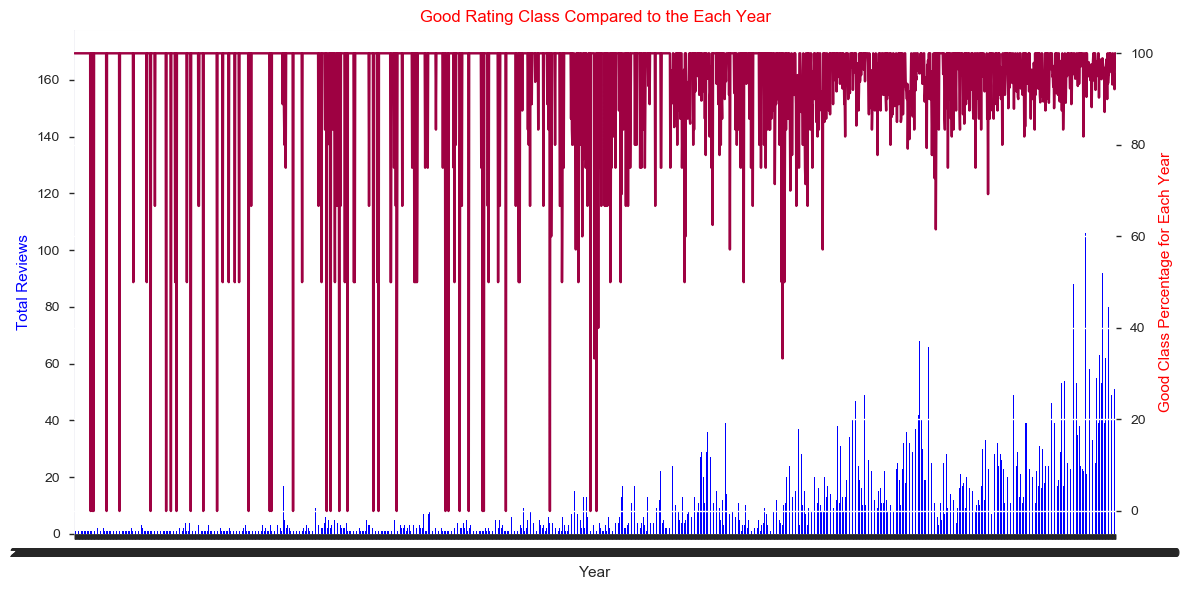

In [13]:
# Create a graph for each rating class to compare within the years

df2['rating_class_num'] = df2['rating_class'].map({'good': 1, 'bad': 0})

feature = df2.groupby('year').agg({'rating_class_num':['size', 'sum', 'mean']})
feature.columns = [' '.join(col).strip() for col in feature.columns.values]
feature = feature.reset_index()
feature['rating_class_num mean'] = feature['rating_class_num mean']*100
feature.columns = ['Year', 'Total Reviews', 'Relevant Rating Number', 
                    '% of Relevant Rating Number in This Year'] 
plt.figure(figsize = (12,8))
fig0, ax1 = plt.subplots(figsize = (12,6))
ax2 = ax1.twinx()
feature.set_index(feature['Year'], drop=True, inplace=True)
feature["Total Reviews"].plot(kind = 'bar', stacked = True, ax = ax1, colormap = 'winter', rot=0)
feature['% of Relevant Rating Number in This Year'].plot(use_index = False, 
                                                         kind = 'line', ax = ax2, colormap='Spectral')   

plt.title('Good Rating Class Compared to the Each Year', color='r')
ax1.set_xlabel('Year')
ax1.yaxis.label.set_color('blue')
ax1.set_ylabel("Total Reviews")
ax2.set_ylabel("Good Class Percentage for Each Year")
ax2.yaxis.label.set_color('red')
plt.tight_layout()
plt.show()

Except 2002, 'good ratings' percentage is progressing over 92%. 2002 has the lowest good ratings with 88% overall (There are only 25 reviews). 'good ratings' percentage is 100% in 2000 (10 reviews) and 2001 (16 reviews). As it might be seen in the graph, the overall good rating is progressing between 93% and 97% in home and kitchen products.

### 2.2. "customer" Feature

#### Unique Customers

In [14]:
# How many unique customers do we have in the dataset?
print('Number of unique customers: {}'.format(len(df2['customer'].unique())))

Number of unique customers: 1395


In [15]:
# Create a "year" column and drop time column
df2['time'] = pd.to_datetime(df2['time'])
df2['year'] = df2['time'].dt.year
df2 = df2.drop('time', axis = 1)
df2.head(3)

,customer,product,rating,review_text,pos_feedback,neg_feedback,rating_class,clean_text,year,rating_class_num
0,A1115ST6F5CWYP,B00000JGRT,4.0,good for a first ice cream machine I have had ...,29,4,good,good first ice cream machine one year still ru...,2006,1
1,A188JOXWF4EY1R,B00000JGRT,4.0,Wonderful Product! We actually found this prod...,4,0,good,wonderful product actually found product clear...,2010,1
2,AUAX1QWUCYKSX,B00000JGRT,5.0,"Works as expected This product works great, if...",1,0,good,work expected product work great unit kept fre...,2009,1


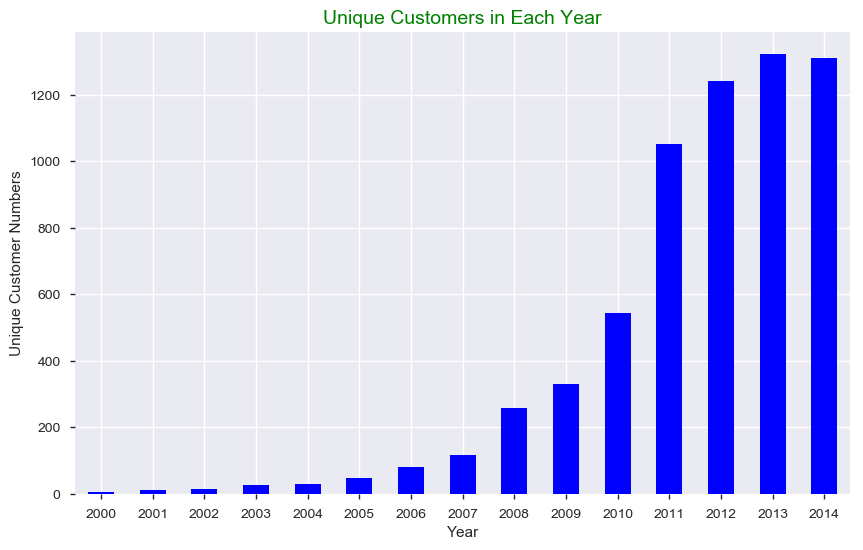

year
2000       6
2001      13
2002      15
2003      26
2004      29
2005      49
2006      80
2007     116
2008     258
2009     329
2010     543
2011    1052
2012    1240
2013    1323
2014    1311
Name: customer, dtype: int64


In [16]:
# How many unique customers in each year?
unique_cust = df2.groupby('year')['customer'].nunique()

# Plot unique customer numbers in each year
plt.figure(figsize = (10,6))
unique_cust.plot(kind='bar', rot = 0, colors = 'b')
plt.title('Unique Customers in Each Year', color='g', size = 14)
plt.xlabel('Year')
plt.ylabel('Unique Customer Numbers')
plt.show()

# Print unique customer numbers in each year
print(unique_cust)

We have total 1395 unique customers who gave good reviews and 699 customers who gave bad reviews in the dataset. As it may be observed in the chart and table, the number of unique customers for each year has increased with the progress of the year.

#### How many unique customers do we have in each rating class?

In [17]:
# unique customers for each "rating class"
a = list(df2.groupby(['rating_class'])['customer'].unique())  

# number of customers
a2 = [len(a[0]),len(a[1])] 

# number of reviews for each "rating class"
b = list(df2['rating_class'].value_counts())              

uniq_cust_rate = pd.DataFrame({'rating_class': ['bad', 'good'],
                               'number_of_customers': a2,
                               'number_of_reviews': sorted(b)})
print(uniq_cust_rate)

  rating_class  number_of_customers  number_of_reviews
0          bad                  699               1276
1         good                 1395              24000


Comment:
* Here, "customer uniqueness" computed as a metric of "rating class"
* The purpose is undertsanding "how much are the reviews made by different customers 
  or how much are they populated by same customers.
* For instance, number of customers of "rating class bad " is 699 (nearly 50% of all customers), and they made only 5% (1276) of all reviews, this means 95% of the reviews are given by customers whose rating class is good.
* And some customers are populating the review rates which may effect the test scores negatively.
* For a detailed work, this small nuances can make difference and it may be requried to handle them.

### 2.3. "product" Feature

In [18]:
# Print number of unique home and kitchen products in the dataset
print('Number of unique home and kitchen products: {}'.format(len(df2['product'].unique())))

Number of unique home and kitchen products: 1171


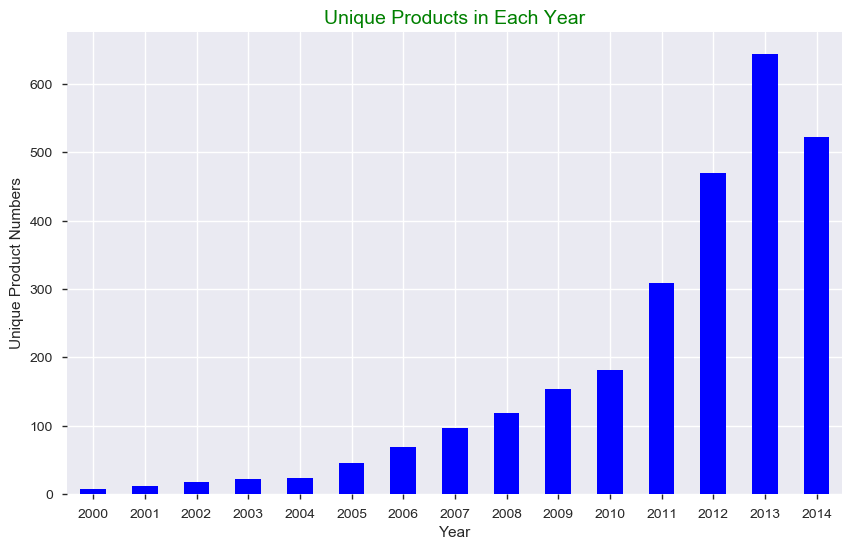

year
2000      7
2001     12
2002     17
2003     22
2004     23
2005     45
2006     68
2007     97
2008    119
2009    153
2010    181
2011    309
2012    470
2013    644
2014    522
Name: product, dtype: int64


In [19]:
# How many unique products in each year?
unique_prod = df2.groupby('year')['product'].nunique()

# Plot unique product numbers in each year
plt.figure(figsize = (10,6))
unique_prod.plot(kind='bar', colors = 'b', rot =0)
plt.title('Unique Products in Each Year', color = 'g', size = 14)
plt.xlabel('Year')
plt.ylabel('Unique Product Numbers')
plt.show()

# Print unique product numbers in each year
print(unique_prod)

We have total 1171 unique products in the dataset which belongs to year between 2000 and 2014. As it may be observed in the chart and table, the number of unique products for each year has increased generally with the progress of the year except 2014. There is a slight decrease in 2014 but we have only data until June in 2014.

### 2.4. "review_ length" Feature

In [20]:
# Function for creating a column token
def token (text):
    token = [w for w in nltk.word_tokenize(text)]
    return token

# To create token feature
df2['token'] = df2['clean_text'].apply(token)

In [21]:
# Function for creating a column to see the length of the review text
def length(text):
    length = len([w for w in nltk.word_tokenize(text)])
    return length

# Apply length function to create review length feature
df2['review_length'] = df2['review_text'].apply(length)
df2.head(3)

,customer,product,rating,review_text,pos_feedback,neg_feedback,rating_class,clean_text,year,rating_class_num,token,review_length
0,A1115ST6F5CWYP,B00000JGRT,4.0,good for a first ice cream machine I have had ...,29,4,good,good first ice cream machine one year still ru...,2006,1,"[good, first, ice, cream, machine, one, year, ...",343
1,A188JOXWF4EY1R,B00000JGRT,4.0,Wonderful Product! We actually found this prod...,4,0,good,wonderful product actually found product clear...,2010,1,"[wonderful, product, actually, found, product,...",386
2,AUAX1QWUCYKSX,B00000JGRT,5.0,"Works as expected This product works great, if...",1,0,good,work expected product work great unit kept fre...,2009,1,"[work, expected, product, work, great, unit, k...",64


In [22]:
# Create review length bin feature
df2['review_length_bin'] = pd.cut(df2['review_length'], np.arange(0,4800,100))
df2.head()

,customer,product,rating,review_text,pos_feedback,neg_feedback,rating_class,clean_text,year,rating_class_num,token,review_length,review_length_bin
0,A1115ST6F5CWYP,B00000JGRT,4.0,good for a first ice cream machine I have had ...,29,4,good,good first ice cream machine one year still ru...,2006,1,"[good, first, ice, cream, machine, one, year, ...",343,"(300, 400]"
1,A188JOXWF4EY1R,B00000JGRT,4.0,Wonderful Product! We actually found this prod...,4,0,good,wonderful product actually found product clear...,2010,1,"[wonderful, product, actually, found, product,...",386,"(300, 400]"
2,AUAX1QWUCYKSX,B00000JGRT,5.0,"Works as expected This product works great, if...",1,0,good,work expected product work great unit kept fre...,2009,1,"[work, expected, product, work, great, unit, k...",64,"(0, 100]"
3,A2C27IQUH9N1Z,B00000JGRT,5.0,this will be one of your favorite small applia...,12,1,good,one favorite small appliance trying ice cream ...,2003,1,"[one, favorite, small, appliance, trying, ice,...",243,"(200, 300]"
4,A2PN65B6BSTIYZ,B00000JGRT,5.0,You'll be addicted to homemade ice cream! I bo...,1,0,good,addicted homemade ice cream bought ice cream m...,2008,1,"[addicted, homemade, ice, cream, bought, ice, ...",248,"(200, 300]"


In [23]:
# Good rating percentages for each length bin with 50's
per_pos_length = df2.groupby(['review_length_bin'])['rating_class_num'].mean()
df2['review_length_bin'] = df2.review_length_bin.astype(str)

per_pos_length = per_pos_length*100
per_pos_length

review_length_bin
(0, 100]         96.249403
(100, 200]       95.903701
(200, 300]       94.794571
(300, 400]       94.340244
(400, 500]       94.110787
(500, 600]       92.413066
(600, 700]       92.187500
(700, 800]       91.644205
(800, 900]       89.837398
(900, 1000]      91.612903
(1000, 1100]     90.140845
(1100, 1200]     83.544304
(1200, 1300]     95.744681
(1300, 1400]     93.750000
(1400, 1500]     83.333333
(1500, 1600]     85.714286
(1600, 1700]     78.571429
(1700, 1800]     66.666667
(1800, 1900]     75.000000
(1900, 2000]    100.000000
(2000, 2100]    100.000000
(2100, 2200]     75.000000
(2200, 2300]     80.000000
(2300, 2400]    100.000000
(2400, 2500]    100.000000
(2500, 2600]           NaN
(2600, 2700]    100.000000
(2700, 2800]           NaN
(2800, 2900]    100.000000
(2900, 3000]    100.000000
(3000, 3100]           NaN
(3100, 3200]    100.000000
(3200, 3300]           NaN
(3300, 3400]      0.000000
(3400, 3500]    100.000000
(3500, 3600]    100.000000
(3600, 370

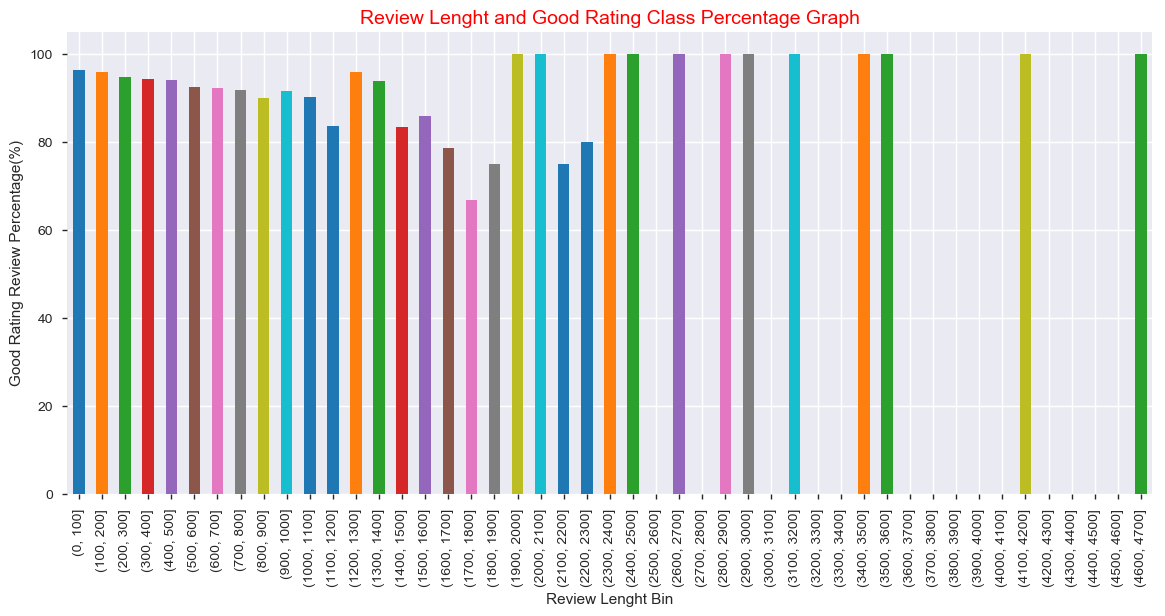

In [24]:
# Plot the graph for good rating class percentage and review length bin
plt.figure(figsize = (14,6))
per_pos_length.plot(kind='bar')
plt.title('Review Lenght and Good Rating Class Percentage Graph', color = 'r', size = 14)
plt.xlabel('Review Lenght Bin')
plt.ylabel('Good Rating Review Percentage(%)')
plt.show()

As it might be seen the graph, the highest percentage of good rating reviews lies between 0-1000 words with 96.2% whereas lowest percentage of good rating reviews lies between 1700-1800 words with 66.6%. As the review length extends, the good rating tends to increase.  Generally, the customers who have write longer reviews (more than 1900 words) tends to give good ratings.

### 2.5. "pos_feedback" Feature

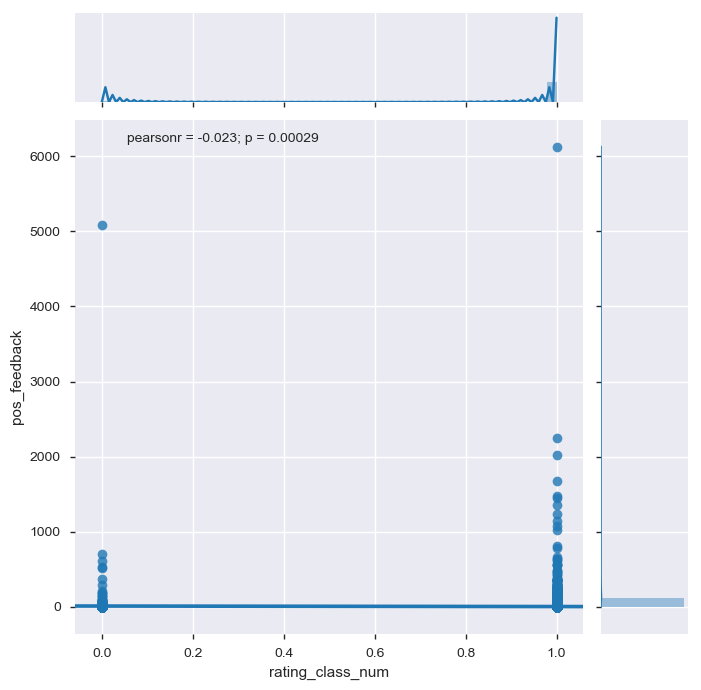

In [25]:
# Correlation between rating_class_num and positive feedback 
sns.jointplot(x ='rating_class_num', y = 'pos_feedback', data = df2, kind = 'reg', size = 7)

There is a slightly negative correlation between rating class and positive feedback. This relationship has no importance. 

### 2.6. "neg_feedback" Feature

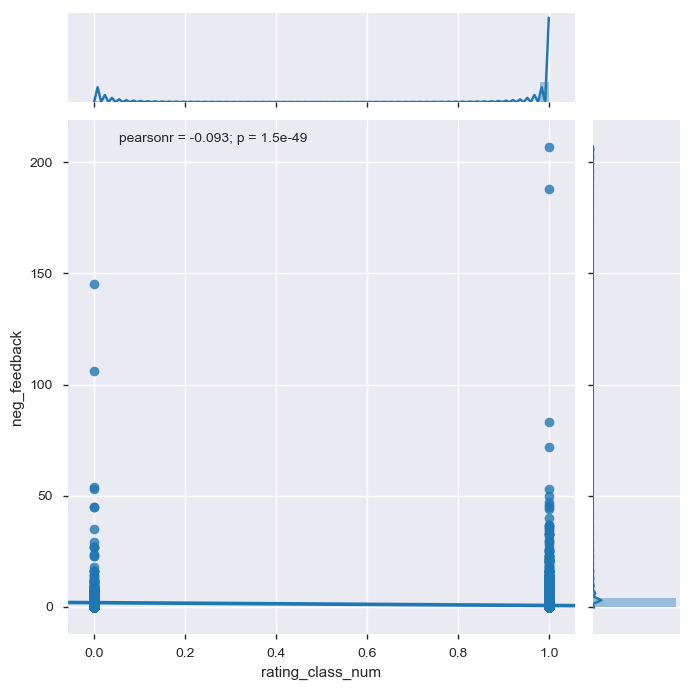

In [26]:
# Correlation between rating_class_num and negative feedback 
sns.jointplot(x ='rating_class_num', y = 'neg_feedback', data = df2, kind = 'reg', size = 7)

Like positive correlation, there is a slightly negative correlation between rating class and negative feedback. This relationship has no importance. 

#### Correlation Between Numeric Variables

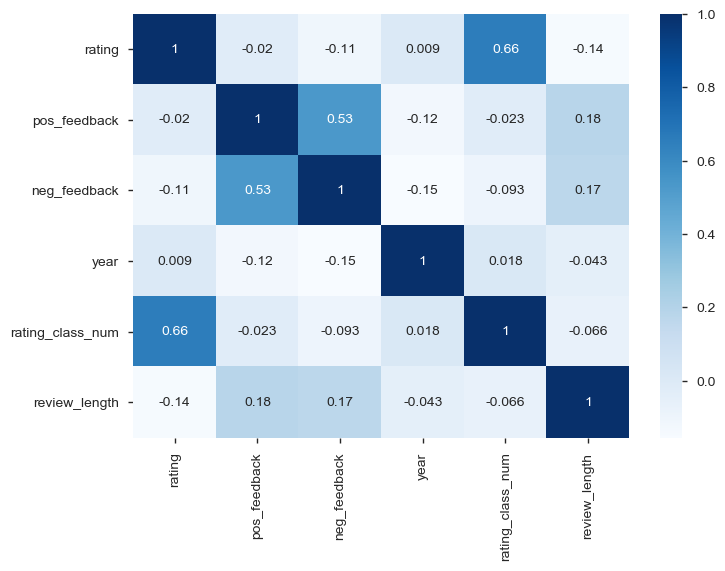

In [27]:
# Plotting correlation matrix between numeric variables
sns.heatmap(df2.corr(method="pearson"), cmap='Blues', annot = True)

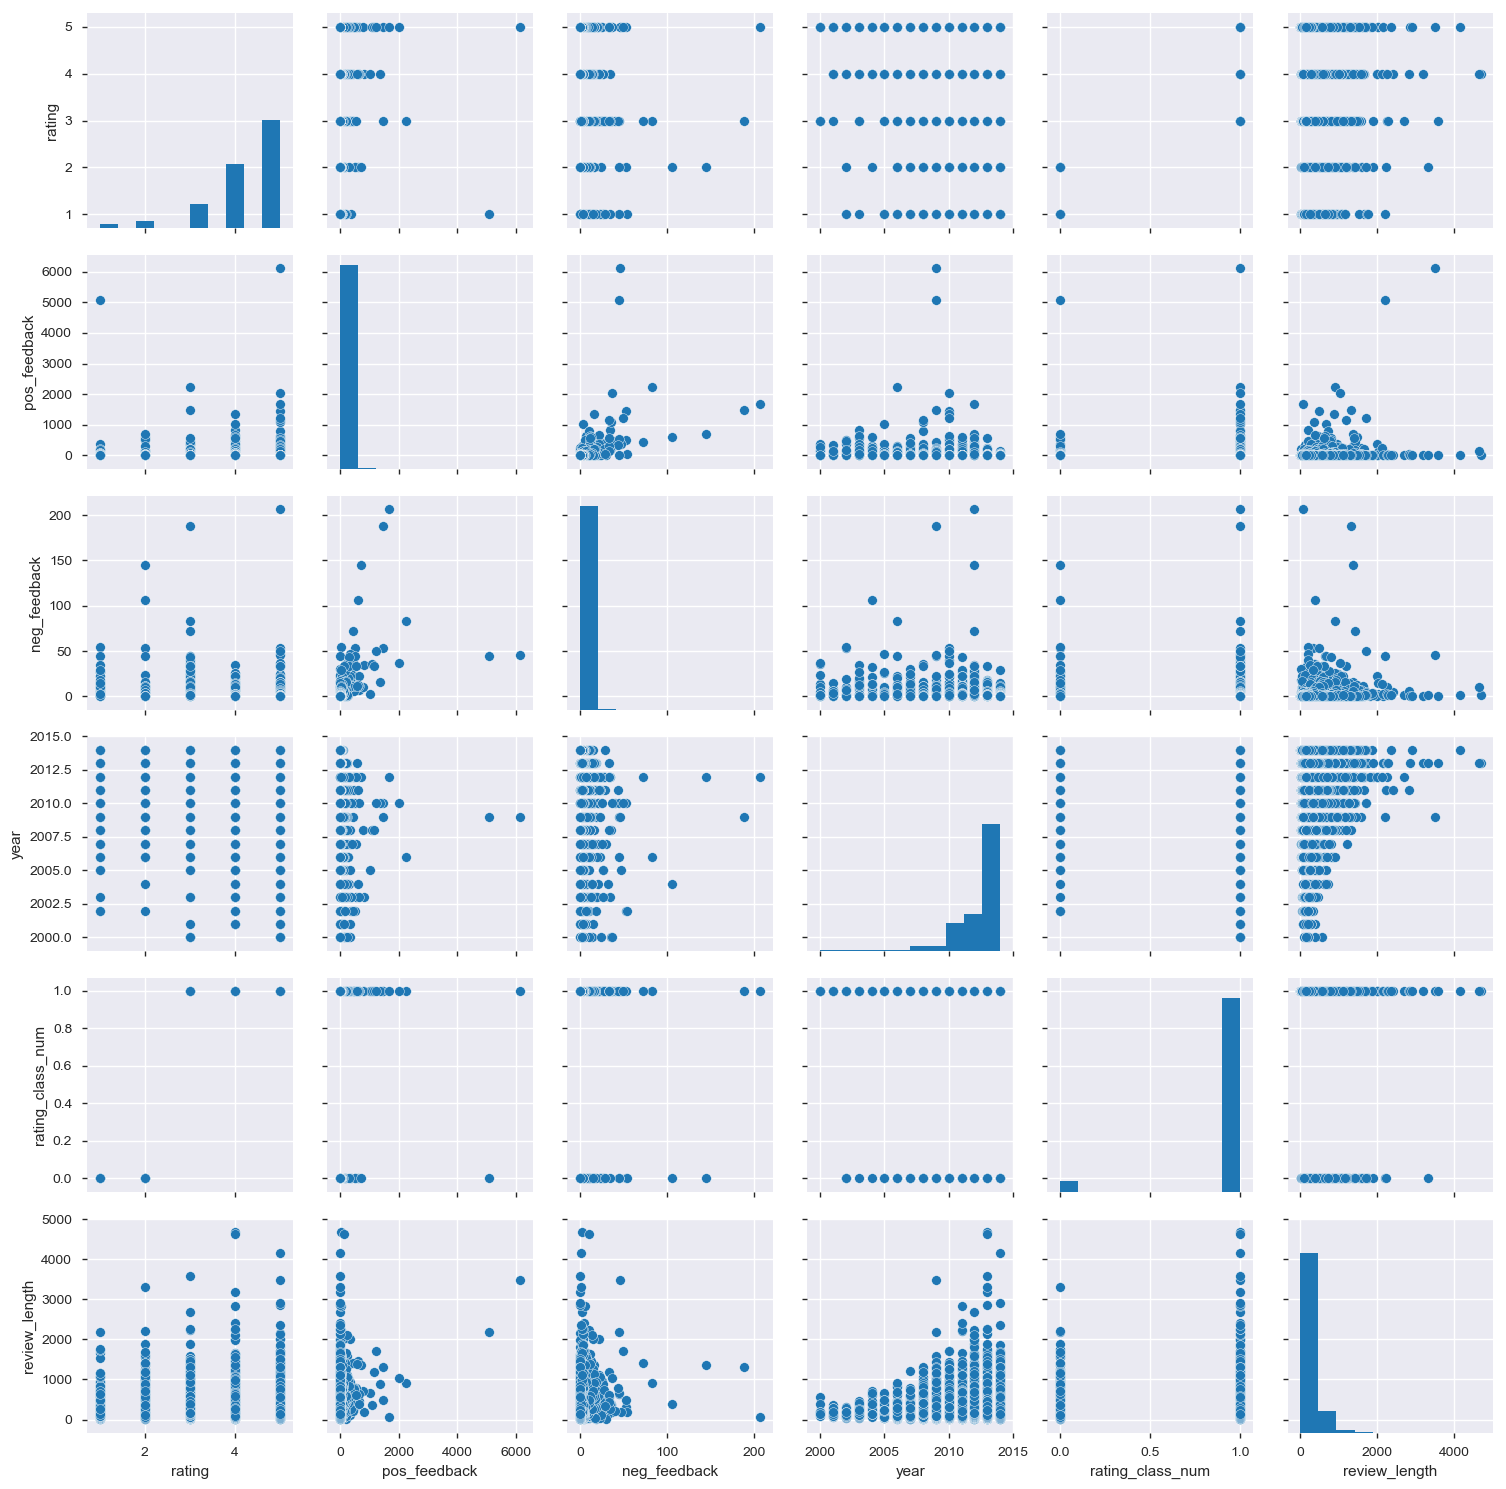

In [28]:
sns.pairplot(df2)

As we mentioned before, as **year** increased, **the lenght of reviews** increased. There is a strong correlation between **positive and negative feedback (pearsonr = 0.53)**, but it has no meaning for sentiment analysis. On the other hand there is slightly negative correletion between both **"positive and negative feedback"** and **"review_lenght"**.   Generally, there is no meaningfull correlation which will effect sentiment analysis. 

### Due to computational considerations, I will reduce reduce the number of observations. I will drop good rating class reviews longer than 150 words, and I will drop all observations earlier than year 2010.

In [29]:
df3 = df2.drop(df2[(df2['review_length'] > 150) & (df2['rating_class'] == 'good')].index)

In [30]:
df3 = df3.drop(df3[(df3['year'] < 2010)].index)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8933 entries, 19 to 25275
Data columns (total 13 columns):
customer             8933 non-null object
product              8933 non-null object
rating               8933 non-null float64
review_text          8933 non-null object
pos_feedback         8933 non-null int64
neg_feedback         8933 non-null int64
rating_class         8933 non-null object
clean_text           8933 non-null object
year                 8933 non-null int64
rating_class_num     8933 non-null int64
token                8933 non-null object
review_length        8933 non-null int64
review_length_bin    8933 non-null object
dtypes: float64(1), int64(5), object(7)
memory usage: 977.0+ KB


### 2.7. "clean_text" Feature

In [31]:
# Create a new data frame with clean text and rating class number
df = df3[["clean_text", "rating_class_num"]]
df.head(10)

,clean_text,rating_class_num
19,better bought would always one chilled ready g...,1
36,great pressure cooker several month since purc...,1
40,lightning deal good quart pot small anything f...,0
42,ergonomically designed work love design scoop ...,1
45,not sturdy son work ice cream shop recieved ic...,0
47,decent scoop already kitchenaid scoop generic ...,1
49,pointed edge nice oxo make nice kitchen produc...,1
50,great icecream scoop scoop give couple great a...,1
52,work well concerned longevity scoop ha comfort...,1
54,great scoop old scoop wa aluminum kind liquid ...,1


In [32]:
# Initialize the countervectorizer
countVec = CountVectorizer(binary=True)

In [33]:
# Fit the 'clean_text' to countvectorizer
countVec.fit(df["clean_text"])

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [34]:
# Transform the matriz
transformed_matrix = countVec.transform(df["clean_text"])

In [35]:
# Convert matrix to array
transformed_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [36]:
# Extracting the feature names
names = countVec.get_feature_names()

In [37]:
# Adding a 'rating' column from previous dataframe's rating value
df4 = pd.DataFrame(transformed_matrix.toarray(), columns=names)
df4['rating'] = df['rating_class_num']

In [38]:
# Create lists for forming a dataframe summary
feature_names = []
avg_ratings = [] 
rating_counts = []
for name in names:
    if name != 'rating':    
        avg_rating = df4[df4[name]== 1]['rating'].mean()
        rating_count = df4[df4[name]== 1]['rating'].count()
        feature_names.append(name)
        avg_ratings.append(avg_rating)
        rating_counts.append(rating_count)  
    else:
        pass

In [39]:
# Create a new dataframe from words, average ratings, and rating counts
df_summary = pd.DataFrame({'feature_name':feature_names, 'avg_rating': avg_ratings, 'rating_count':rating_counts})

In [40]:
# Let's see the new dataframe
df_summary

,feature_name,avg_rating,rating_count
0,aa,0.666667,3
1,aaa,0.875000,8
2,aaargh,1.000000,1
3,aand,NaN,0
4,aaroma,1.000000,1
5,ab,0.000000,1
6,aback,NaN,0
7,abamboo,1.000000,1
8,abate,NaN,0
9,abco,1.000000,1


#### Good rating words

In [68]:
# Words that are commonly used in the reviews which have good ratings
df_good = df_summary.query("rating_count > 100").sort_values(by='avg_rating', ascending=False)[:100]
df_good.head(50)

,feature_name,avg_rating,rating_count
11986,oven,0.915094,106
9673,light,0.910448,134
5825,ever,0.902913,103
4066,cut,0.900990,101
5760,especially,0.896552,116
10548,might,0.893805,113
5000,done,0.892157,102
6362,find,0.890110,182
18324,try,0.888199,161
4787,dish,0.882883,111


In [43]:
wc_good = dict(zip(df_good['feature_name'].tolist(), df_good['avg_rating'].tolist()))

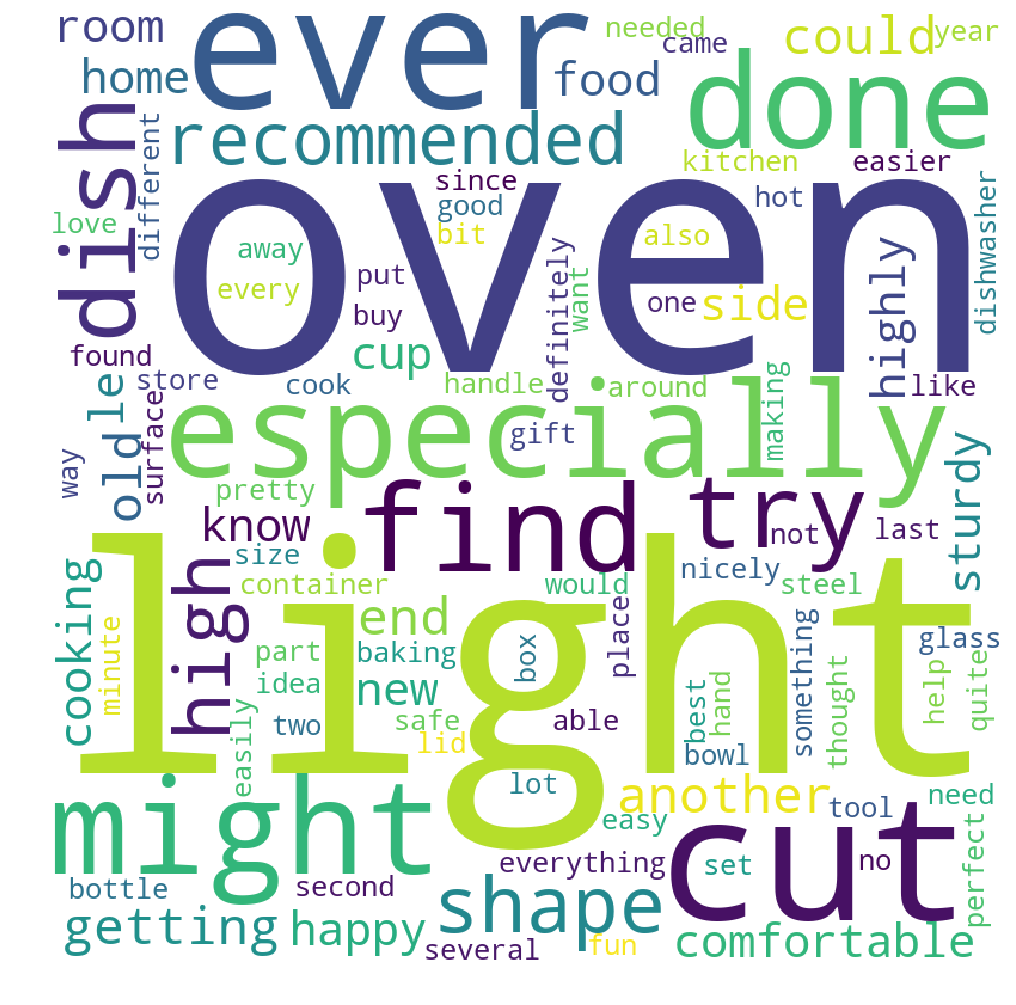

In [44]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate_from_frequencies(wc_good)
 
# plot the WordCloud image                       
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Fixing the rating count value is above 100, the most common 50 words which belong to good rating class are shown in the table above. Each of these words define which products what kind of good impression have on the customers. 

#### Bad rating words

In [45]:
# Words that are commonly used in the reviews which have bad ratings
df_bad = df_summary.query("rating_count > 100").sort_values(by= 'avg_rating', ascending=True)[:100]

In [69]:
df_bad.head(50)

,feature_name,avg_rating,rating_count
10057,machine,0.752212,113
12452,perfectly,0.754717,106
1758,bottom,0.765060,166
6423,fit,0.776224,286
1455,big,0.776786,224
16177,space,0.779874,159
932,attractive,0.784314,102
489,although,0.784314,102
17822,three,0.787037,108
531,amount,0.790476,105


In [47]:
wc_bad = dict(zip(df_bad['feature_name'].tolist(), df_bad['avg_rating'].tolist()))

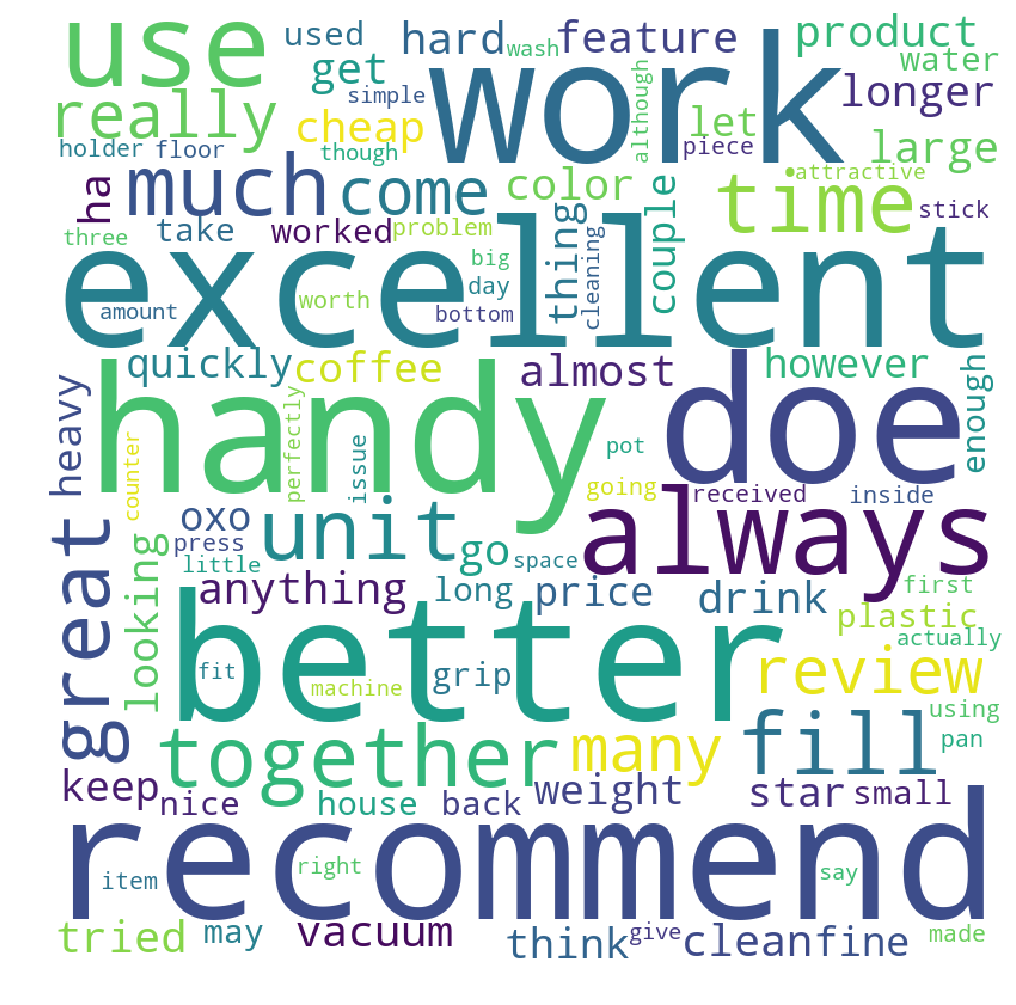

In [48]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate_from_frequencies(wc_bad)
 
# plot the WordCloud image                       
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Same standards as above, the most common 50 words which belong to bad rating class are shown in this table. Likewise, in good ratings, each of these words define which products what kind of bad impression have on the customers. 
Controversial Cases:

The controversial case such as "I was expecting better - negative meaning" or "it was better than my expectation - positive meaning " will be handled in the modelling section via using deep learning technique (Keras with Word2Vec).

# Exploratory Data Analysis Summary:

Customers wrote reviews and gave ratings, which ranged between 1 to 5, for each home and kitchen product they bought in the Amazon online market. In overall, customers were seemed to be averagely satisfied with the products which they experienced.

We diminished those 5 rating categories into two categories such as 'good' and 'bad' in order to implement a sentiment analysis on their reviews. According to those reviews, there is an imbalance between rating classes. Especially 1 and 2 ratings have small portions according to other classes. 95.0% of the reviews (24000) are classified as good, whereas 5.0 % of them (1276) are classified as bad.

Except 2012, 'good ratings' percentage is progressing over 90%. 2002 has the lowest good ratings with 88% overall (There are only 25 reviews). 'good ratings' percentage is 100% in 2000 (10 reviews) and 2001 (16 reviews). As it might be seen in the graph, the overall good rating is progressing between 93% and 97% in home and kitchen products.

The highest percentage of good rating reviews lies between 0-1000 words with 96.2% whereas lowest percentage of good rating reviews lies between 1700-1800 words with 66.6%. As the review length extends, the good rating tends to increase. Generally, the customers who have write longer reviews tends to give good ratings.

There is no strong correlation between any two numeric variables. As we mentioned before, as year increased, the lenght of reviews increased. There is a strong correlation between positive and negative feedback (pearsonr = 0.53), but it has no meaning for sentiment analysis. On the other hand there is slightly negative correletion between both "positive and negative feedback" and "review_lenght". Generally, there is no meaningfull correlation which will effect sentiment analysis.

Due to computational considerations, I reduced reduce the number of observations. I dropped the good_rating_class_reviews longer than 150 words, and I dropped all observations earlier than year 2010. After reducing, there are 8933 observations ( 7731 "good" reviews and 1202 "bad" reviews).

The most common words used to reflect good and bad sentiments are shown above and we may extract insights from each categories' words. However, most significant inference of text graphs is that there is a great number of matching words among review texts of different rating classes. Using numeric variables may not be useful for prediction
 The controversial case such as "I was expecting better - negative meaning" or "it was better than my expectation - positive meaning " will be handled in the modelling section via using deep learning technique (Keras with Word2Vec).

In [49]:
df3.to_csv('D:\GENEL\SPRINGBOARD\PROJECTS\CAPSTONE PROJECTS\CAPSTONE PROJECT-2/Reduced_Cleaned_Reviews_Home_and_Kitchen.csv', sep=',', encoding='utf-8', index = False)